In [1]:
import os
import re
import itertools
import pickle
from collections import Counter,defaultdict
try:
	import pandas as pd
	import numpy as np
	from nltk.corpus import stopwords
    
	from nltk.stem import PorterStemmer
	import gensim
	from gensim.models import Word2Vec
	from nltk.stem import WordNetLemmatizer
	from keras.utils import np_utils
except:
	print("require modules: keras,gensim,nltk.stem,nltk.corpus,nltk.stem, please install it.")
	exit()

c:\users\96bub\anaconda3_1\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
reg1 = re.compile("\.txt$")
reg2 = re.compile("([0-9]+)\.txt")
reg3 = re.compile(".*_([0-9])\.txt")
reg4 = re.compile("\[.+\]")
reg5 = re.compile("info\.txt")
lyrics_dic = {}
#iter all directory and load all song(txt file)
for i in os.listdir():
    if os.path.isdir(i):
        for path,sub,items in os.walk(i):
            if any([reg1.findall(item) for item in items]):
                for item in items:
                    if reg5.findall(item):
                        continue
                    if reg3.findall(item):
                        num = ["0"+reg3.findall(item)[0]]
                        name = "_".join(path.split("/") + num)
                    else:
                        name = "_".join(path.split("/") + reg2.findall(item))

                    with open(os.path.join(path,item),"r",encoding="utf8", errors='ignore') as f:
                        lyrics = "".join(f.readlines())
                        lyrics = reg4.subn("",lyrics)[0]
                        lyrics_dic[name] = lyrics

In [137]:
len(lyrics_dic.keys())

777

In [3]:
df=pd.DataFrame(columns=["lyrics","mood"])

In [4]:
for key in lyrics_dic.keys():
    #print(key)
    if "Happy" in key:
        
        df=df.append({"lyrics":lyrics_dic[key],"mood":"1"},ignore_index=True)
    elif "Sad" in key:
        df=df.append({"lyrics":lyrics_dic[key],"mood":"2"},ignore_index=True)
    elif "Angry" in key:
        df=df.append({"lyrics":lyrics_dic[key],"mood":"3"},ignore_index=True)
    elif "Relaxed" in key:
        df=df.append({"lyrics":lyrics_dic[key],"mood":"4"},ignore_index=True)

In [140]:
df.head()

lyrics mood
0  Put your lips close to mine\nAs long as they d...    1
1  My lullaby,hung out to dry\nWhat's up with tha...    1
2  Though you've played at love and lost\nAnd sor...    1
3  we know we are the ones\nwho do it numb again\...    1
4  Another day has come and gone\nThey fade away ...    1

In [5]:
df = df.sample(frac=1).reset_index(drop=True)

In [6]:
df_new=pd.read_csv("df_mood_backup.csv")

In [7]:
df_new.tail()

Unnamed: 0                   file           artist  \
600        9913  TRAREDZ12903CFB6E3.h5   Pelle Carlberg   
601        9943  TRATTMT128F149167B.h5  Michael Jackson   
602        9966  TRAWFGF128E0792FE0.h5          Extreme   
603        9967  TRAWFVE128F42912CA.h5     Dimmu Borgir   
604        9969  TRBDMIN128F147FCBB.h5     Phil Collins   

                                                 title  \
600  Clever Girls Like Clever Boys Much More Than C...   
601                                  Ain't No Sunshine   
602                                     Stop The World   
603                                          Sympozium   
604                                     One More Night   

                                                lyrics  \
600  You should have listened to what mama said\nAn...   
601  Spoken Intro:\nYou ever want something\nThat y...   
602  All the world's a masquerade\nMade up of fools...   
603  Chains of despair cloacked by darkness\nThe th...   
604  One more night\nOne more night\n\nI've been tr...   

                                                  tags  mood  
600  ['handclaps', 'title is a full sentence', 'ind...     1  
601  ['soul', 'michael jackson', '70s', 'pop', 'cov...     2  
602  ['hard rock', 'rock', 'funk metal', 'Power bal...     2  
603  ['Symphonic Black Metal', 'black metal', 'melo...     3  
604  ['80s', 'pop', 'Phil Collins', 'soft rock', 'r...     2

In [8]:
df_new=df_new[["lyrics","mood"]]

In [9]:
df3=df.append(df_new,ignore_index=True)

In [10]:
df3["mood"]=df3["mood"].apply(str)

In [11]:
set(df3["mood"].values)
df=df3

In [12]:
df.shape

(1382, 2)

In [13]:
df_new=pd.read_excel("test.xls")

In [14]:
df_new.shape

(244, 5)

In [15]:
df_new=df_new[['lyrics','mood']]
df_new=df_new.dropna()

In [16]:
# df_new['Mood']=pd.to_numeric(df_new['Mood'],downcast='integer')
df_new['mood']=df_new['mood'].astype(int)

In [17]:
df_new['mood'].value_counts()
df_new["mood"]=df_new["mood"].apply(str)

In [18]:
df=df.append(df_new.sample(n=100),ignore_index=True)
df = df.sample(frac=1).reset_index(drop=True)
set(df["mood"].values)

{'1', '2', '3', '4'}

In [19]:
df.to_csv('training_backup.csv',index=False)
df_new.to_csv('testing_backup.csv',index=False)

In [20]:
dfk=pd.read_csv("testing_backup.csv")
dfk.shape

(243, 2)

In [21]:
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.ensemble import RandomForestClassifier
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

c:\users\96bub\anaconda3_1\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\96bub\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\96bub\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\96bub\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [22]:
df_new['lyrics'] = [entry.lower() for entry in df_new['lyrics']]
df_new['lyrics']= [word_tokenize(entry) for entry in df_new['lyrics']]

In [23]:
df['lyrics'] = [entry.lower() for entry in df['lyrics']]
df['lyrics']= [word_tokenize(entry) for entry in df['lyrics']]

In [24]:
tag_map = defaultdict(lambda : wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV
for index,entry in enumerate(df_new['lyrics']):
    Final_words = []
    word_Lemmatized = WordNetLemmatizer()
    for word, tag in pos_tag(entry):
        if word not in stopwords.words('english') and word.isalpha():
            word_Final = word_Lemmatized.lemmatize(word,tag_map[tag[0]])
            Final_words.append(word_Final)
    df_new.loc[index,'text_final'] = str(Final_words)

In [25]:
df.tail()

lyrics mood
1477  [i, used, to, think, maybe, you, loved, me, no...    1
1478  [i, was, walking, down, the, street, one, day,...    1
1479  [it, 's, hard, to, explain, inherently, it, 's...    2
1480  [this, one, goes, out, to, you, and, yours, wo...    1
1481  [i, think, when, i, am, in, front, of, the, mi...    1

In [26]:
tag_map = defaultdict(lambda : wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV
for index,entry in enumerate(df['lyrics']):
    Final_words = []
    word_Lemmatized = WordNetLemmatizer()
    for word, tag in pos_tag(entry):
        if word not in stopwords.words('english') and word.isalpha():
            word_Final = word_Lemmatized.lemmatize(word,tag_map[tag[0]])
            Final_words.append(word_Final)
    df.loc[index,'text_final'] = str(Final_words)

In [27]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\96bub\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [90]:

data=df_new[["text_final","Mood"]]
data_x=df_new["text_final"]
data_y=df_new["Mood"]

KeyError: "['Mood'] not in index"

In [ ]:
from sklearn.model_selection import train_test_split
train_x,valid_x,train_y,valid_y = train_test_split(data_x, data_y, test_size=0.3, random_state=0)

In [ ]:
df_new.dropna()
df_new.shape


In [34]:
train_x = df['text_final']
valid_x = df_new['text_final'][:242]
train_y = df['mood']
valid_y = df_new['mood'][:242]

In [35]:
Encoder = LabelEncoder()
train_y = Encoder.fit_transform(train_y.ravel())
valid_y = Encoder.fit_transform(valid_y.ravel())

In [36]:

all_texts = []

for items in train_x:
    all_texts.append(items)
    
for items in valid_x:
    all_texts.append(items)
print(all_texts[0])

['soul', 'oh', 'oh', 'oh', 'everything', 'want', 'heart', 'love', 'baby', 'love', 'forever', 'let', 'explain', 'feel', 'first', 'easy', 'say', 'need', 'love', 'try', 'describe', 'mean', 'feel', 'like', 'use', 'work', 'melody', 'sincere', 'heaven', 'earth', 'light', 'give', 'birth', 'make', 'woman', 'every', 'colour', 'world', 'like', 'lion', 'rule', 'jungle', 'rule', 'heart', 'thank', 'turn', 'night', 'day', 'every', 'second', 'minute', 'hour', 'need', 'see', 'face', 'need', 'touch', 'smell', 'hug', 'day', 'kiss', 'hug', 'smell', 'touch', 'teas', 'please', 'say', 'name', 'matter', 'always', 'soul', 'heart', 'love', 'everything']


In [37]:
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition, ensemble

import pandas,numpy,xgboost, textblob, string
from keras.preprocessing import text, sequence
from keras import layers, models, optimizers

In [38]:
count_vect = CountVectorizer(analyzer='word')
count_vect.fit(all_texts)
xtrain_count =  count_vect.transform(train_x)
xvalid_count =  count_vect.transform(valid_x)

In [41]:
import nltk
import string
import re

porter_stemmer = nltk.stem.porter.PorterStemmer()
def porter_tokenizer(text, stemmer=porter_stemmer):
    lower_txt = text.lower()
    tokens = nltk.wordpunct_tokenize(lower_txt)
    stems = [porter_stemmer.stem(t) for t in tokens]
    no_punct = [s for s in stems if re.match('^[a-zA-Z]+$', s) is not None]
    return no_punct
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer(
            encoding='utf-8',
            decode_error='replace',
            strip_accents='unicode',
            analyzer='word',
            binary=False,
            stop_words="english",
            tokenizer=porter_tokenizer
    )

In [42]:
# tfidf_vect = TfidfVectorizer(analyzer='word',max_features=7000)
tfidf_vect.fit(all_texts)
xtrain_tfidf =  tfidf_vect.transform(train_x)
xvalid_tfidf =  tfidf_vect.transform(valid_x)

tfidf_vect_ngram = TfidfVectorizer(analyzer='word', ngram_range=(2,2), max_features=7000)
tfidf_vect_ngram.fit(all_texts)
xtrain_tfidf_ngram =  tfidf_vect_ngram.transform(train_x)
xvalid_tfidf_ngram =  tfidf_vect_ngram.transform(valid_x)

In [43]:
def train_model(classifier, feature_vector_train, label, feature_vector_valid, is_neural_net=False):
    classifier.fit(feature_vector_train, label)
    predictions = classifier.predict(feature_vector_valid)
    
    if is_neural_net:
        predictions = predictions.argmax(axis=-1)
    
    return metrics.accuracy_score(predictions, valid_y)

In [44]:
accuracy_count_nb = train_model(naive_bayes.MultinomialNB(), xtrain_count, train_y, xvalid_count)
print ("NB, Count Vectors: ", accuracy_count_nb)

accuracy_word_nb = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf, train_y, xvalid_tfidf)
print ("NB, WordLevel TF-IDF: ", accuracy_word_nb)

accuracy_ngram_nb = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
print ("NB, N-Gram Vectors: ", accuracy_ngram_nb)

NB, Count Vectors:  0.49173553719008267
NB, WordLevel TF-IDF:  0.41735537190082644
NB, N-Gram Vectors:  0.5495867768595041


In [45]:
accuracy_count_rf = train_model(RandomForestClassifier(n_estimators=100),xtrain_count,train_y,xvalid_count)
print("RF, Count Vectors: ",accuracy_count_rf)

accuracy_word_rf = train_model(RandomForestClassifier(n_estimators=100),xtrain_tfidf,train_y,xvalid_tfidf)
print("RF, WordLevel TF-IDF Vectors: ",accuracy_word_rf)

accuracy_ngram_rf = train_model(RandomForestClassifier(n_estimators=100),xtrain_tfidf_ngram,train_y,xvalid_tfidf_ngram)
print("RF, N-Gram Vectors: ",accuracy_ngram_rf)

RF, Count Vectors:  0.5909090909090909
RF, WordLevel TF-IDF Vectors:  0.5867768595041323
RF, N-Gram Vectors:  0.5661157024793388


In [46]:
accuracy_count_lc = train_model(linear_model.LogisticRegression(), xtrain_count, train_y, xvalid_count)
print ("LR, Count Vectors: ", accuracy_count_lc)

accuracy_word_lc = train_model(linear_model.LogisticRegression(), xtrain_tfidf, train_y, xvalid_tfidf)
print ("LR, WordLevel TF-IDF: ", accuracy_word_lc)

accuracy_ngram_lc = train_model(linear_model.LogisticRegression(), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
print ("LR, N-Gram Vectors: ", accuracy_ngram_lc)

LR, Count Vectors:  0.5495867768595041
LR, WordLevel TF-IDF:  0.5578512396694215
LR, N-Gram Vectors:  0.5082644628099173


In [47]:
accuracy_count_bo = train_model(xgboost.XGBClassifier(), xtrain_count.tocsc(), train_y, xvalid_count.tocsc())
print ("Xgb, Count Vectors: ", accuracy_count_bo)

accuracy_word_bo = train_model(xgboost.XGBClassifier(), xtrain_tfidf.tocsc(), train_y, xvalid_tfidf.tocsc())
print ("Xgb, WordLevel TF-IDF: ", accuracy_word_bo)

accuracy_ngram_bo = train_model(xgboost.XGBClassifier(), xtrain_tfidf_ngram.tocsc(), train_y, xvalid_tfidf_ngram.tocsc())
print ("Xgb, Ngram Level Vectors: ", accuracy_ngram_bo)

c:\users\96bub\anaconda3_1\lib\site-packages\sklearn\preprocessing\label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Xgb, Count Vectors:  0.5082644628099173


c:\users\96bub\anaconda3_1\lib\site-packages\sklearn\preprocessing\label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Xgb, WordLevel TF-IDF:  0.47107438016528924
Xgb, Ngram Level Vectors:  0.35537190082644626


c:\users\96bub\anaconda3_1\lib\site-packages\sklearn\preprocessing\label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [48]:
accuracy_count_bg = train_model(ensemble.RandomForestClassifier(), xtrain_count, train_y, xvalid_count)
print ("RF, Count Vectors: ", accuracy_count_bg)

accuracy_word_bg = train_model(ensemble.RandomForestClassifier(), xtrain_tfidf, train_y, xvalid_tfidf)
print ("RF, WordLevel TF-IDF: ", accuracy_word_bg)

accuracy_ngram_bg = train_model(ensemble.RandomForestClassifier(), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
print ("RF, Ngram Vectors: ", accuracy_ngram_bg)

RF, Count Vectors:  0.5826446280991735
RF, WordLevel TF-IDF:  0.5785123966942148
RF, Ngram Vectors:  0.5206611570247934


In [51]:

import matplotlib as mpl
import numpy as np

def plot_cm(X, y, clf, title):

    cm = metrics.confusion_matrix(y, clf.predict(X))

    np.set_printoptions(suppress=True)
    mpl.rc("figure", figsize=(10,10))

    hm = sns.heatmap(cm, 
            cbar=False,
            annot=True, 
            square=True,
            fmt='d',
            yticklabels=['happy','sad','angry','relaxed'],
            xticklabels=['happy','sad','angry','relaxed'],
            cmap='Blues'
            )
    plt.title(title)
    plt.ylabel('actual class')
    plt.xlabel('predicted class')
    plt.tight_layout()
    plt.show()

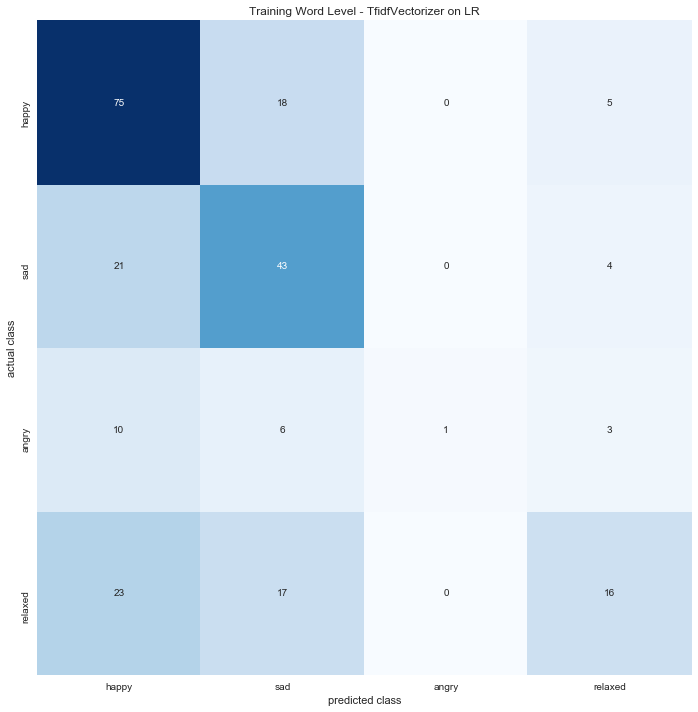

In [52]:

import seaborn as sns
import matplotlib.pyplot as plt
# import SVM
claf = linear_model.LogisticRegression()
claf.fit(xtrain_tfidf, train_y)
plot_cm(xvalid_tfidf, valid_y, claf, 'Training Word Level - TfidfVectorizer on LR')

In [98]:
def pred(lyrics):
    wt=word_tokenize(lyrics)
    tag_map = defaultdict(lambda : wn.NOUN)
    tag_map['J'] = wn.ADJ
    tag_map['V'] = wn.VERB
    tag_map['R'] = wn.ADV
    Final_words = []
    word_Lemmatized = WordNetLemmatizer()
    for word, tag in pos_tag(wt):
        if word not in stopwords.words('english') and word.isalpha():
            word_Final = word_Lemmatized.lemmatize(word,tag_map[tag[0]])
            Final_words.append(word_Final)
    result = str(Final_words)
    df9=pd.DataFrame(columns=["lyrics"])
    df9=df9.append({'lyrics':result},ignore_index=True)
#     xvalid_count =  count_vect.transform(result)
#     res = Encoder.fit_transform(result)
    testx=df9['lyrics']
#     print(testx.shape)
    xvalid_tfidf =  tfidf_vect.transform(testx)
    y=claf.predict(xvalid_tfidf)
    print("Tag: ",end='')
    if y==0:
        print("Happy")
    elif(y==1):
        print("Sad")
    elif(y==2):
        print("Angry")
    elif(y==3):
        print("Relaxed")
    
    

In [99]:
pred("Evenings, as if they're mad,\nnights like some tunnel..\nI don't know why on rebel flights only,\nO God, my heart comes..\nO God, my heart is interested..\nThere is a question about tomorrow,\n[as in, no one knows what happens tomorrow]\nLiving life is now.\nI don't know why in nomadic ways only\nI find my heart interested, O Lord,\nmy heart is interested..\nMy philosophy is - my bag is on my shoulders.\nI go wherever the path takes me..\nNot on the drops,\nBut the sea of drops itself..\nO God, O God.. O God..")

Tag: Happy


In [100]:
from googletrans import Translator
def pred1(lyrics):
    translator = Translator()
    l1=translator.translate(lyrics)
    print(l1)
    lyrics=l1.text
    wt=word_tokenize(lyrics)
    tag_map = defaultdict(lambda : wn.NOUN)
    tag_map['J'] = wn.ADJ
    tag_map['V'] = wn.VERB
    tag_map['R'] = wn.ADV
    Final_words = []
    word_Lemmatized = WordNetLemmatizer()
    for word, tag in pos_tag(wt):
        if word not in stopwords.words('english') and word.isalpha():
            word_Final = word_Lemmatized.lemmatize(word,tag_map[tag[0]])
            Final_words.append(word_Final)
    result = str(Final_words)
    df9=pd.DataFrame(columns=["lyrics"])
    df9=df9.append({'lyrics':result},ignore_index=True)
#     xvalid_count =  count_vect.transform(result)
#     res = Encoder.fit_transform(result)
    testx=df9['lyrics']
#     print(testx.shape)
    xvalid_tfidf =  tfidf_vect.transform(testx)
    y=claf.predict(xvalid_tfidf)
    print("Tag: ",end='')
    if y==0:
        print("Happy")
    elif(y==1):
        print("Sad")
    elif(y==2):
        print("Angry")
    elif(y==3):
        print("Relaxed")

In [101]:
pred1("Shaamein malang see\nRaatein surang see\nBaaghi udaan pe hi naa jaane kyun\nIlahi mera jee aaye aaye\nIlaahi mera jee aaye aaye\n DaDa dang dang dung dung dang...\nKal pe sawaal hai\njeena filhaal hai\nKhaanaabadoshiyon pe hi jaane kyoon\nIlahi meraa jee aaye aaye\nIlaahi mera jee aaye aaye\nMeraa falsafaa kandhe pe mera bastaa\nChalaa main jahaan le chalaa mujhe rastaa\nBoondon pe nahin\nBoondon ke samandar pe wo-o-wo-o...\nIlahi mera jee aaye aaye\nIlahi mera jee aaye aaye..\nShaamein malang si\nRaatein surang si\nBaaghi udaan pe hi na jaane kyun\nIlahi mera jee aaye aaye\nIlahi mera jee aaye aaye\nIlahii.. Ilahi.. Ilahi...")

Translated(src=hi, dest=en, text=See all
Look up
Go to the top of the page
It is my life
I am sorry to say
 DaDa dang dung dung dang ...
I see it
jeena filhaal
Why do you go to Khaanaabadoshiyan?
I am sorry to say
I am sorry to say
Meraa falsafaa kandhe pe mera bastaa
I want to go to school today
No boondon
Boondon ki samandar pe wo-o-wo-o ...
It is my life
Ilahi mera jee aaye aaye ..
Shaamein malang si
Raatein surang si
Go to the top of the page
It is my life
It is my life
Ilahi .. Ilahi .. Ilahi ..., pronunciation=None, extra_data="{'translat...")
Tag: Happy
